### Grain size distribution for each Yerba Mate granulometry

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_1 = pd.read_csv('coarse\dimensions_YM2_gruesa_297x210.jpg.csv')
df_2 = pd.read_csv('medium\dimensions_YM2_medium_297x210.jpg.csv')
df_3 = pd.read_csv('fine\dimensions_YM2_fine_297x210.jpg.csv')
df_4 = pd.read_csv('extrafine\dimensions_YM2_extrafine_200x150.jpg.csv')

df_tot = pd.concat([df_1, df_2, df_3, df_4])
df_tot


,length,width,granulometry
0,0.000385,0.001970,coarse
1,0.001071,0.001188,coarse
2,0.001439,0.001941,coarse
3,0.001205,0.001593,coarse
4,0.001054,0.001072,coarse
...,...,...,...
3057,0.000367,0.000248,extrafine
3058,0.000275,0.000219,extrafine
3059,0.000214,0.000350,extrafine
3060,0.000428,0.000277,extrafine


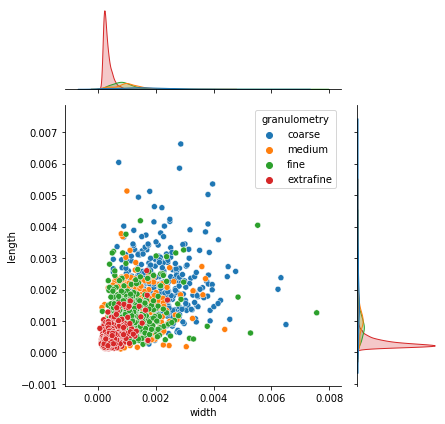

In [5]:
sns.jointplot(data=df_tot, x='width', y='length', hue='granulometry', kind='scatter', ratio=3)
#plt.xlim(0, 16)
#plt.ylim(0, 16)

plt.show()

In [4]:
#Normalization of the data
df_tot[df_tot['granulometry']=='coarse']['length'] = [float(leng)/sum(df_tot['length']) for leng in df_tot['length']]
df_tot['width'] = [float(leng)/sum(df_tot['width']) for leng in df_tot['length']]

ValueError: Length of values (5695) does not match length of index (604)

In [ ]:
df_tot[df_tot['granulometry']=='coarse']['length']

0      0.000106
1      0.000294
2      0.000395
3      0.000330
4      0.000289
         ...   
599    0.000395
600    0.001376
601    0.000528
602    0.000941
603    0.000541
Name: length, Length: 604, dtype: float64